## Task A

In [1]:
# import the package needed
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
from motionchart.motionchart import MotionChart
from mpl_toolkits.axes_grid1 import host_subplot
matplotlib.style.use("ggplot")

Populating the interactive namespace from numpy and matplotlib


### A1 Investigating the Population Data

### A1-1 Plot the population of Victoria, New South Wales and Queensland over time

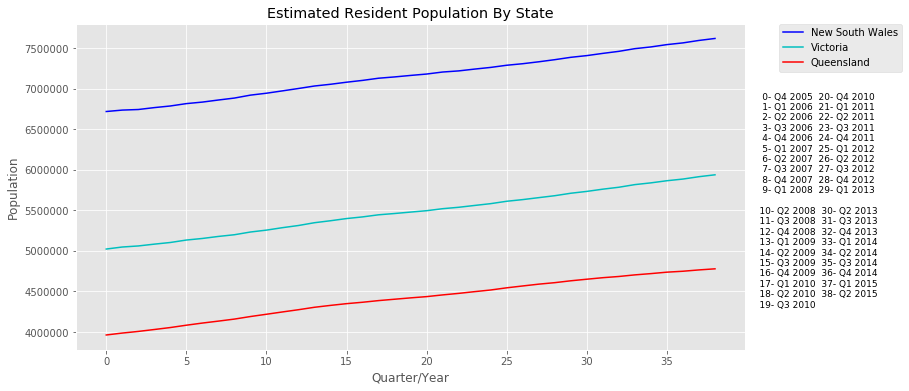

In [2]:
# parse and formate the data for analysis
df1 = pd.read_csv('EstimatedResidentPopulationByStateAndGender.csv')
# df1.head()
df1.rename(columns={ "Unnamed: 0" :"Date"}, inplace=True)

df1_vnq = df1.loc[:, 'Estimated Resident Population ;  Persons ;  New South Wales ;'\
                :'Estimated Resident Population ;  Persons ;  Queensland ;'] # All rows, some columns


# data visualisation by using matplotlib
plt.figure(figsize = (12, 6))
plt.plot(df1_vnq.index.values, df1_vnq['Estimated Resident Population ;  Persons ;  New South Wales ;']\
         , color= 'b', label="New South Wales")
plt.plot(df1_vnq.index.values, df1_vnq['Estimated Resident Population ;  Persons ;  Victoria ;']\
         , color= 'c',label="Victoria")
plt.plot(df1_vnq.index.values, df1_vnq['Estimated Resident Population ;  Persons ;  Queensland ;']\
         , color= 'r',label="Queensland")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Quarter/Year')
plt.ylabel('Population')
plt.title('Estimated Resident Population By State')

txt = '''
      0- Q4 2005  20- Q4 2010 
      1- Q1 2006  21- Q1 2011 
      2- Q2 2006  22- Q2 2011 
      3- Q3 2006  23- Q3 2011 
      4- Q4 2006  24- Q4 2011 
      5- Q1 2007  25- Q1 2012 
      6- Q2 2007  26- Q2 2012 
      7- Q3 2007  27- Q3 2012 
      8- Q4 2007  28- Q4 2012  
      9- Q1 2008  29- Q1 2013
      
     10- Q2 2008  30- Q2 2013
     11- Q3 2008  31- Q3 2013
     12- Q4 2008  32- Q4 2013
     13- Q1 2009  33- Q1 2014
     14- Q2 2009  34- Q2 2014
     15- Q3 2009  35- Q3 2014
     16- Q4 2009  36- Q4 2014
     17- Q1 2010  37- Q1 2015
     18- Q2 2010  38- Q2 2015
     19- Q3 2010  
    '''
figtext(0.9, 0.2, txt, color='k', fontsize=9)
plt.show()

### A1-2 Fit a linear regression

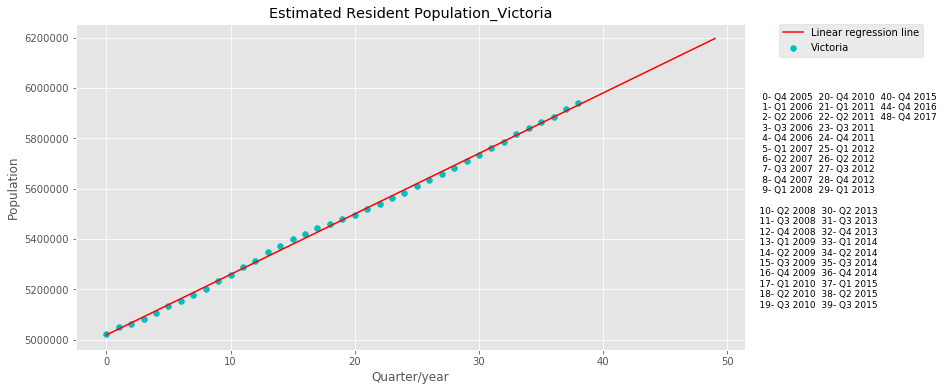

In [3]:
x = df1_vnq.index.values
y = df1_vnq['Estimated Resident Population ;  Persons ;  Victoria ;']

# data visualisation by using matplotlib and 
# use data for linear modeling 
plt.figure(figsize = (12, 6))
plt.scatter(x, y , color= 'c',label="Victoria")
plt.xlabel('Quarter/year')
plt.ylabel('Population')
plt.title('Estimated Resident Population_Victoria')

lm = LinearRegression()
mdl = lm.fit(x.reshape(-1,1),y)
m = mdl.coef_[0]
b = mdl.intercept_
x_len = len(df1_vnq)+10
plt.plot([0,x_len],[m*0+b,m*x_len+b],color= 'r',label="Linear regression line")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

txt = '''
      0- Q4 2005  20- Q4 2010  40- Q4 2015
      1- Q1 2006  21- Q1 2011  44- Q4 2016
      2- Q2 2006  22- Q2 2011  48- Q4 2017
      3- Q3 2006  23- Q3 2011  
      4- Q4 2006  24- Q4 2011 
      5- Q1 2007  25- Q1 2012 
      6- Q2 2007  26- Q2 2012 
      7- Q3 2007  27- Q3 2012 
      8- Q4 2007  28- Q4 2012  
      9- Q1 2008  29- Q1 2013
      
     10- Q2 2008  30- Q2 2013
     11- Q3 2008  31- Q3 2013
     12- Q4 2008  32- Q4 2013
     13- Q1 2009  33- Q1 2014
     14- Q2 2009  34- Q2 2014
     15- Q3 2009  35- Q3 2014
     16- Q4 2009  36- Q4 2014
     17- Q1 2010  37- Q1 2015
     18- Q2 2010  38- Q2 2015
     19- Q3 2010  39- Q3 2015
    '''
figtext(0.9, 0.2, txt, color='k', fontsize=9)
plt.show()

In [4]:
#linear Regression for Prediction of Resident Population, VIC
lm = LinearRegression()
mdl = lm.fit(x.reshape(-1,1),y)
m = mdl.coef_[0]
b = mdl.intercept_

def exp_val ( x, m, b):
    val = m*x+b
    return int(val)

print ("Q3_2015 Prediction of Resident Population, Victoria:", exp_val ( 39, m, b))
print ("Q4_2015 Prediction of Resident Population, Victoria:", exp_val ( 40, m, b))
print ("Q4_2016 Prediction of Resident Population, Victoria:", exp_val ( 44, m, b))
print ("Q4_2017 Prediction of Resident Population, Victoria:", exp_val ( 48, m, b))

Q3_2015 Prediction of Resident Population, Victoria: 5955909
Q4_2015 Prediction of Resident Population, Victoria: 5979953
Q4_2016 Prediction of Resident Population, Victoria: 6076128
Q4_2017 Prediction of Resident Population, Victoria: 6172303


### A2  Investigating the Job Vacancies Data

### A2-1 Plot the job vacancy counts for Victoria over time

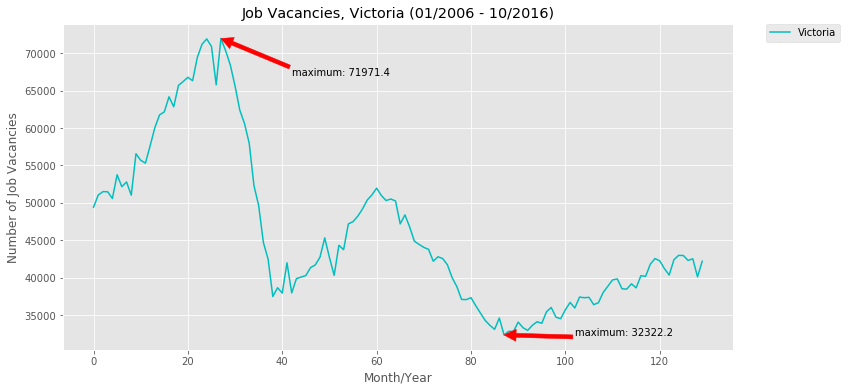

In [5]:
# parse and formate the data for analysis
df2 = pd.read_csv('JobVacancies.csv')
df2 = df2.T
# df2.head()

new_header = df2.iloc[0]  
df2 = df2[1:]
df2.columns = new_header  #set columns' values
df2.columns.names = ['']  # remove column name

date = df2.index    # reformating dataframe 
df2.insert(0, "Date", date)
df2.reset_index(drop=True, inplace=True)

# data visualisation by using matplotlib
plt.figure(figsize = (12, 6))
plt.plot(df2.index.values, df2['VIC'], color= 'c', label="Victoria")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Month/Year')
plt.ylabel('Number of Job Vacancies')
plt.title('Job Vacancies, Victoria (01/2006 - 10/2016)')

#show max and min
# df2[df2['VIC'] == df2['VIC'].max()]   #2008-04-01
# df2[df2['VIC'] == df2['VIC'].min()]   #2013-04-01
max_v=df2['VIC'].max()
max_i=df2['VIC'].idxmax()
min_v=df2['VIC'].min()
min_i=df2['VIC'].idxmin()
plt.annotate('maximum: '+ str(max_v), xy=(max_i, max_v), xytext=(max_i+15, max_v-5000), arrowprops={'color':'red'})
plt.annotate('maximum: '+ str(min_v), xy=(min_i, min_v), xytext=(min_i+15, min_v), arrowprops={'color':'red'})     

plt.show()

### A2-2 Fit a linear regression to the data

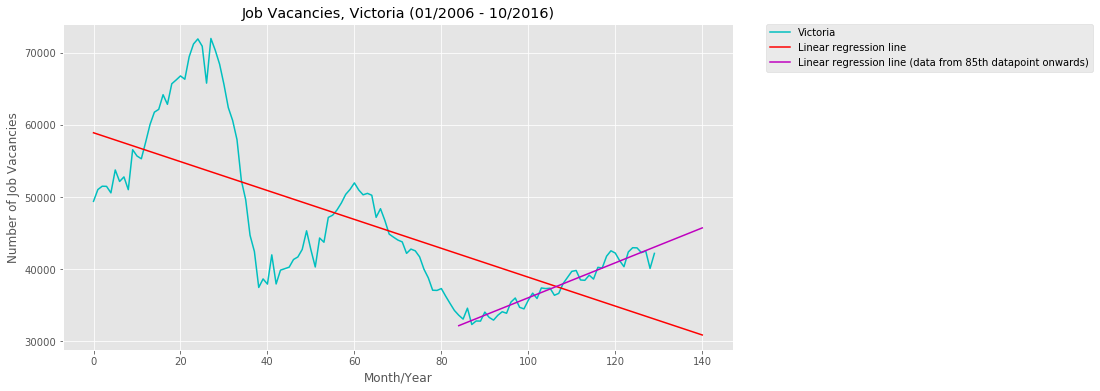

In [6]:
# data visualisation by using matplotlib
plt.figure(figsize = (12, 6))
plt.plot(df2.index.values, df2['VIC'], color= 'c', label="Victoria")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Month/Year')
plt.ylabel('Number of Job Vacancies')
plt.title('Job Vacancies, Victoria (01/2006 - 10/2016)')

x = df2.index.values
y = df2['VIC']

#use all data to do lm
lm = LinearRegression()
mdl = lm.fit(x.reshape(-1,1),y)
m = mdl.coef_[0]
b = mdl.intercept_
x_len = len(df2)+10
plt.plot([0,x_len],[m*0+b,m*x_len+b],color= 'r',label="Linear regression line")

#use recent data to do lm
x2 = df2.index.values[85-1:]
y2 = df2['VIC'][85-1:]   
mdl2 = lm.fit(x2.reshape(-1,1),y2)
m2 = mdl2.coef_[0]
b2 = mdl2.intercept_
plt.plot([85-1,x_len],[m2*(85-1)+b2,m2*x_len+b2],color= 'm',\
         label="Linear regression line (data from 85th datapoint onwards)")


legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


### A3. Investigating the Unemployment Data

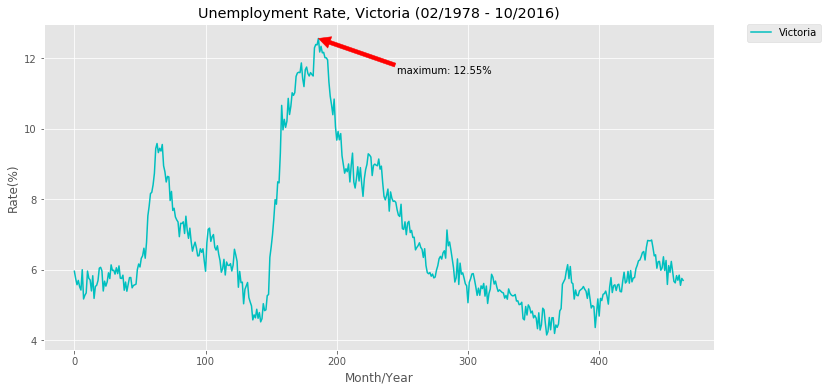

The unemployment peak at 1993-08-01 with rate 12.55%.


In [7]:
# parse and formate the data for analysis
data = pd.ExcelFile('EmploymentTimeSeries.xls')
#print(data.sheet_names)
df3 = data.parse('Time Series')
df3_vic = df3[df3['State/Territory']=='VIC']
df3_vic.reset_index(drop=True, inplace=True)
# df3_vic.head()


# data visualisation by using matplotlib
plt.figure(figsize = (12, 6))
plt.plot(df3_vic.index.values, df3_vic['Unemployment Rate (15+)'], color= 'c', label="Victoria")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Month/Year')
plt.ylabel('Rate(%)')
plt.title('Unemployment Rate, Victoria (02/1978 - 10/2016)')


max_v=df3_vic['Unemployment Rate (15+)'].max()
max_i=df3_vic['Unemployment Rate (15+)'].idxmax()
plt.annotate('maximum: '+ str(round(max_v,2))+'%', \
             xy=(max_i, max_v), xytext=(max_i+60, max_v-1), arrowprops={'color':'red'})

plt.show()

#find when have the highest unemployment rate
max_v_date = df3_vic['Date'][max_i]
max_v_date = max_v_date.strftime('%Y-%m-%d')
print ("The unemployment peak at", max_v_date, "with rate", str(round(max_v,2))+"%.")   # see if can draw a line to show when, and change index to date

### A4. Visualising the Relationship between Unemployment and Job Vacancies

### A4-1 Combine the data from the different files into a single table

In [8]:
#df1.head()
df1_1 = df1.drop(df1.columns[1:19], axis=1)
df1_1 = df1_1.drop(df1.columns[-1], axis=1)
# df1_new.head()
print (df1_1.columns.values)

['Date' 'Estimated Resident Population ;  Persons ;  New South Wales ;'
 'Estimated Resident Population ;  Persons ;  Victoria ;'
 'Estimated Resident Population ;  Persons ;  Queensland ;'
 'Estimated Resident Population ;  Persons ;  South Australia ;'
 'Estimated Resident Population ;  Persons ;  Western Australia ;'
 'Estimated Resident Population ;  Persons ;  Tasmania ;'
 'Estimated Resident Population ;  Persons ;  Northern Territory ;'
 'Estimated Resident Population ;  Persons ;  Australian Capital Territory ;']


In [9]:
state = df1_1.columns.values[1:] # original name for states

i = 0
frames = []
for item in df1_1.columns.values[1:]:
    temp = df1_1[[df1_1.columns.values[0],item]]
    temp.columns.values[1] = 'Population'
    temp.insert(1, "State", item)
    i+=1
    frames.append(temp) 
df1_new = pd.DataFrame
df1_new = pd.concat(frames)
df1_new.head()

,Date,State,Population
0,2005-12-01,Estimated Resident Population ; Persons ; Ne...,6718023
1,2006-03-01,Estimated Resident Population ; Persons ; Ne...,6735528
2,2006-06-01,Estimated Resident Population ; Persons ; Ne...,6742690
3,2006-09-01,Estimated Resident Population ; Persons ; Ne...,6766133
4,2006-12-01,Estimated Resident Population ; Persons ; Ne...,6786160


In [10]:
old = ['Estimated Resident Population ;  Persons ;  New South Wales ;',
       'Estimated Resident Population ;  Persons ;  Victoria ;',
       'Estimated Resident Population ;  Persons ;  Queensland ;',
       'Estimated Resident Population ;  Persons ;  South Australia ;',
       'Estimated Resident Population ;  Persons ;  Western Australia ;',
       'Estimated Resident Population ;  Persons ;  Tasmania ;',
       'Estimated Resident Population ;  Persons ;  Northern Territory ;',
       'Estimated Resident Population ;  Persons ;  Australian Capital Territory ;']

new = [ "New South Wales", "Victoria", "Queensland" , "South Australia", "Western Australia",\
        "Tasmania", "Northern Territory", "Australian Capital Territory"]

for i in range(0, len(old)):
    df1_new['State'].replace( to_replace= old[i], value= new[i], inplace= True)
df1_new.head()

,Date,State,Population
0,2005-12-01,New South Wales,6718023
1,2006-03-01,New South Wales,6735528
2,2006-06-01,New South Wales,6742690
3,2006-09-01,New South Wales,6766133
4,2006-12-01,New South Wales,6786160


In [11]:
# df2.head()
i = 0
frames = []
for item in df2.columns.values[1:]:
    temp = df2[[df2.columns.values[0],item]]
    temp.columns.values[1] = 'Job Vacancies'
    temp.insert(1, "State", item)
    i+=1
    frames.append(temp) 
frames
df2_new = pd.DataFrame
df2_new = pd.concat(frames)
df2_new


old = ["NSW", "VIC","QLD","SA","WA","TAS","NT","ACT"]
new = [ "New South Wales", "Victoria", "Queensland" , "South Australia", "Western Australia",\
        "Tasmania", "Northern Territory", "Australian Capital Territory"]

for i in range(0, len(old)):
    df2_new['State'].replace( to_replace= old[i], value= new[i], inplace= True)
df2_new.head()

,Date,State,Job Vacancies
0,2006-01-01,New South Wales,73047.8
1,2006-02-01,New South Wales,73995
2,2006-03-01,New South Wales,75246.3
3,2006-04-01,New South Wales,76539.8
4,2006-05-01,New South Wales,75614.9


In [12]:
# df3.head()
old = ["NSW", "VIC","QLD","SA","WA","TAS","NT","ACT"]
new = [ "New South Wales", "Victoria", "Queensland" , "South Australia", "Western Australia",\
        "Tasmania", "Northern Territory", "Australian Capital Territory"]

for i in range(0, len(old)):
    df3['State/Territory'].replace( to_replace= old[i], value= new[i], inplace= True)
df3.head()

df3_new = df3.drop(df3.columns[[2,4]], axis=1)
df3_new.rename(columns={ "State/Territory" :"State"}, inplace=True)
df3_new.rename(columns={ "Unemployment Rate (15+)" :"Unemployment Rate"}, inplace=True)
df3_new["Date"] = df3_new["Date"].apply(lambda x: x.strftime('%Y-%m-%d'))
df3_new.head()

,State,Date,Unemployment Rate
0,New South Wales,1978-02-01,6.773762
1,New South Wales,1978-03-01,6.490161
2,New South Wales,1978-04-01,6.507978
3,New South Wales,1978-05-01,6.115171
4,New South Wales,1978-06-01,6.424127


In [13]:
# Combine three data frame to a data frame to get all data together in a desired formate for further data analysis
df_cb = pd.DataFrame()
df_cb = pd.merge(df1_new, df2_new, on=["State",'Date'], how='outer')
df_cb = pd.merge(df_cb, df3_new, on=["State",'Date'], how='outer')
df_cb.reset_index(drop=True, inplace=True)
df_cb.head()

,Date,State,Population,Job Vacancies,Unemployment Rate
0,2005-12-01,New South Wales,6718023.0,NaN,5.293757
1,2006-03-01,New South Wales,6735528.0,75246.3,4.978780
2,2006-06-01,New South Wales,6742690.0,81637.1,5.288439
3,2006-09-01,New South Wales,6766133.0,76411.3,5.200780
4,2006-12-01,New South Wales,6786160.0,80972.6,4.811675


In [14]:
df_cb = df_cb.dropna(axis=0, how='any')
df_cb.reset_index(drop=True, inplace=True)
df_cb.head() #use time better

,Date,State,Population,Job Vacancies,Unemployment Rate
0,2006-03-01,New South Wales,6735528.0,75246.3,4.978780
1,2006-06-01,New South Wales,6742690.0,81637.1,5.288439
2,2006-09-01,New South Wales,6766133.0,76411.3,5.200780
3,2006-12-01,New South Wales,6786160.0,80972.6,4.811675
4,2007-03-01,New South Wales,6815359.0,88785,4.957025


In [15]:
print ("The first date for the combined data is", df_cb["Date"][df_cb.index[0]])
print ("The last date for the combined data is",df_cb["Date"][df_cb.index[-1]])

The first date for the combined data is 2006-03-01
The last date for the combined data is 2015-06-01


### A4-2 relationship between unemployment and the number of job vacancies.

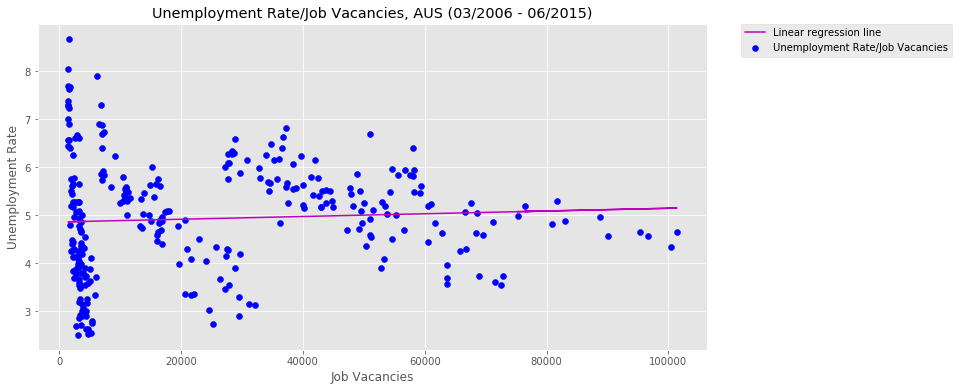

In [16]:
#???? A4.2  lm? lb?
x= df_cb['Job Vacancies']
y= df_cb["Unemployment Rate"]

plt.figure(figsize = (12, 6))
plt.scatter(x,y, color= 'b', label="Unemployment Rate/Job Vacancies")

plt.xlabel('Job Vacancies')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate/Job Vacancies, AUS (03/2006 - 06/2015)')

lm = LinearRegression()
mdl = lm.fit(x.values.reshape(-1,1),y)
m = mdl.coef_[0]
b = mdl.intercept_
plt.plot(x, m*x + b, color= 'm',label="Linear regression line")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### A4-3 relationship between unemployment and the number of job vacancies for VIC only

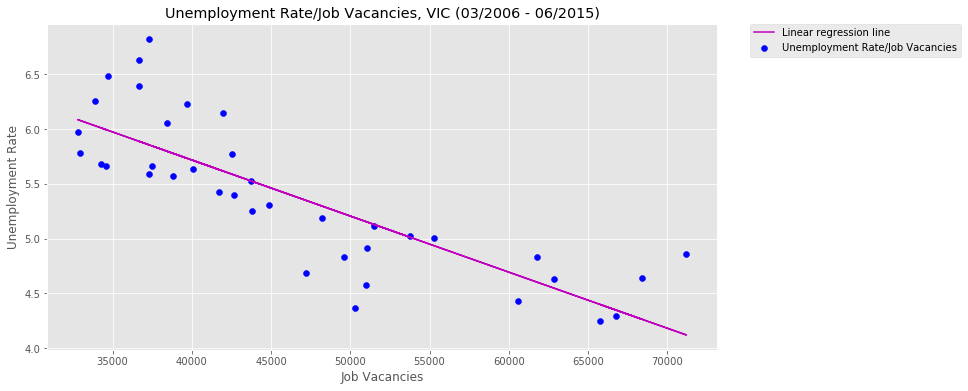

In [17]:
df_cb_vic = df_cb[df_cb['State']== "Victoria"]

x= df_cb_vic['Job Vacancies']
y= df_cb_vic["Unemployment Rate"]

plt.figure(figsize = (12, 6))
plt.scatter(x,y, color= 'b', label="Unemployment Rate/Job Vacancies")

plt.xlabel('Job Vacancies')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate/Job Vacancies, VIC (03/2006 - 06/2015)')

lm = LinearRegression()
mdl = lm.fit(x.values.reshape(-1,1),y)
m = mdl.coef_[0]
b = mdl.intercept_
plt.plot(x, m*x + b, color= 'm',label="Linear regression line")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### A4-4 relationship between the unemployment rate and the job vacancy rate for all the data

In [18]:
df_cb["Job Vacancies Rate"] = (df_cb["Job Vacancies"] / df_cb["Population"] ) *100
df_cb.head()

,Date,State,Population,Job Vacancies,Unemployment Rate,Job Vacancies Rate
0,2006-03-01,New South Wales,6735528.0,75246.3,4.978780,1.11716
1,2006-06-01,New South Wales,6742690.0,81637.1,5.288439,1.21075
2,2006-09-01,New South Wales,6766133.0,76411.3,5.200780,1.12932
3,2006-12-01,New South Wales,6786160.0,80972.6,4.811675,1.1932
4,2007-03-01,New South Wales,6815359.0,88785,4.957025,1.30272


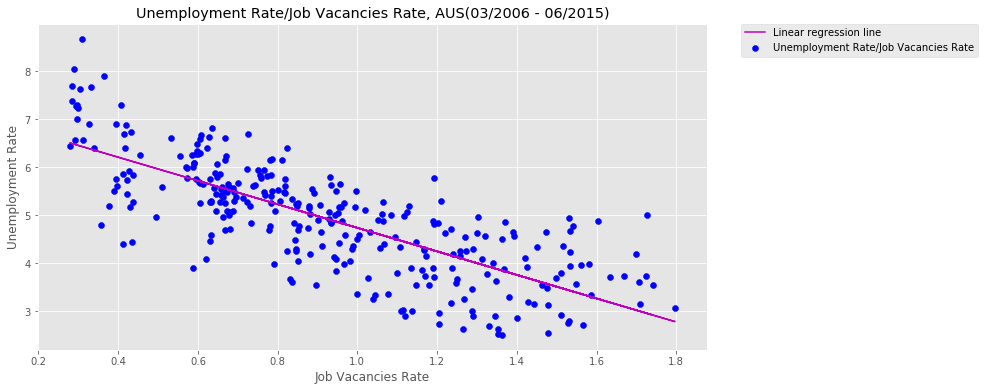

In [19]:
#???? lm why???? red。  lb?
#add sns regression?

x= df_cb['Job Vacancies Rate']
y= df_cb["Unemployment Rate"]

plt.figure(figsize = (12, 6))
plt.scatter(x,y, color= 'b', label="Unemployment Rate/Job Vacancies Rate")

plt.xlabel('Job Vacancies Rate')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate/Job Vacancies Rate, AUS(03/2006 - 06/2015)')

lm = LinearRegression()
mdl = lm.fit(x.values.reshape(-1,1),y)
m = mdl.coef_[0]
b = mdl.intercept_
plt.plot(x, m*x + b, color= 'm',label="Linear regression line")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### A5-1 Visualising the Relationship over Time by using Motion Chart

In [1]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [21]:
mChart = MotionChart(df = df_cb, key='Date', x='Job Vacancies Rate', y='Unemployment Rate', xscale='linear', yscale='linear',
                     size='Population', color='State', category='State')
mChart.to_notebook()

### A5-2 Answer Question written in the report in PDF file